# Importing FITS Images

In [66]:
import datetime
import re
import os.path
import platform
import pyfits
import matplotlib.pyplot as pp
%matplotlib inline

In [42]:
# string for subfolder = imagename2subfolder( string for image name )
def imagename2subfolder(imagename = None):
    # Special case if imagename is not provided
    if imagename is None: return 'None'
    
    # Default values for pattern (future version: include as an optional input)
    re_pattern = '\d\d-\d\d-\d\d\d\d_\d\d_\d\d_\d\d'
    datetime_format = '%m-%d-%Y_%H_%M_%S'
    
    # Find '/' in the string and remove it
    
    # Extract datetime
    imagetimestr = re.findall(re_pattern,imagename)
    if len(imagetimestr) == 1: imagetimestr = imagetimestr[0]
    else: return 'None'
    try: imagetime = datetime.datetime.strptime(imagetimestr,datetime_format)
    except ValueError as err: return err
    
    # Create subfolder
    imageyear = imagetime.strftime('%Y')
    imagemonth = imagetime.strftime('%Y-%m')
    imagedate = imagetime.strftime('%Y-%m-%d')
    subfolder = os.path.join( imageyear, imagemonth, imagedate )
    
    return subfolder

# Uses
print(imagename2subfolder('abcd-07-29-2015_22_03_03-top.fits'))
print(imagename2subfolder(''))
print(imagename2subfolder())
print(imagename2subfolder('07-29-2015_22_93_03'))



2015/2015-07/2015-07-29
None
None
time data '07-29-2015_22_93_03' does not match format '%m-%d-%Y_%H_%M_%S'


In [55]:
# Combining paths
basepath = '/Volumes/Raw Data/Images'
subpath = '2015/2015-12'
fullpath = os.path.join(basepath, subpath)
print(fullpath)

# Connecting to server
print(os.path.exists(fullpath))

# Find the platform
import os
print(os.name)



/Volumes/Raw Data/Images/2015/2015-12
True
posix


In [83]:
# Importing a file
from sys import platform as _platform
print(_platform)

basepath = '/Volumes/Raw Data/Images'

imagename = '03-31-2016_19_39_09_top.fits'
subpath = imagename2subfolder(imagename)
imagepath = os.path.join(basepath,subpath,imagename)
imageformat = os.path.splitext(imagepath)[1]
print(os.path.exists(imagepath))
print(imagepath)
print(imageformat)
if imageformat=='': print('hi')

trial = imagename
trial+='.jpg'
print(trial)

darwin
True
/Volumes/Raw Data/Images/2016/2016-03/2016-03-31/03-31-2016_19_39_09_top.fits
.fits
03-31-2016_19_39_09_top.fits.jpg


(3, 512, 512)


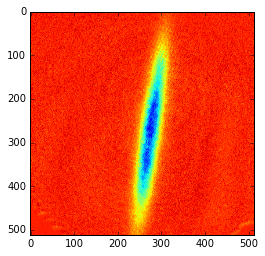

In [71]:
hdulist = pyfits.open(imagepath)
#hdulist.info()
imagedata = hdulist[0].data
print(imagedata.shape)
pp.imshow(imagedata[0]-imagedata[1])